# Protein Function Prediction through Amino Acid Sequences

  >**Usama Raheem 19011519-002** |
  >**Usama Saeed  19011519-003**  |
  >**Qaseem Hussain 19011519-031** 

## Goal
Classification of protein function based on their sequences. 

**The protein function  which the project focusses is the ATP binding.**


# Data collection

Data scraping was performed on several protein sequence and their function from biological databases mainly [Unitprot](https://www.uniprot.org/uniprot/P03960).

>**data-scrapes** contains the sequence in the fasta format and annotation of the various proteins.

# Approach 
The sequence of the protein were augmented after 500 residues. The sequences, which had lower length were artifically padded with '_'.
We used Artifical Neural Network (ANN) to classify the protein function (obtained after hyperparameter tuninng) :  

|     Method    |   Numbers
| ------------- | ------------- |
|      ANN    | 2/3  layers |
| Embedding dim  | 10      |
| Sequence length | 23 |
| Optimizer     | Stochastic Gradient Descent (SGD)   |
| Loss | Binary crossentropy | 
| Nodes | 128|
|Batch size | 128 |
|Learning Rate | 0.001 |
|Accuracy Score | 0.80 |



## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import yaml
sns.set()
from Bio import SeqIO
from tensorflow.keras.preprocessing import sequence


# Scraping/Extracting Sequence from txt File

In [2]:
import re   
import os
import glob 

In [3]:
scrape_dir = os.path.join(r'C:\Users\RG\Desktop\FYP-2023\DL-project', 'data-scrapes')
print(scrape_dir)

C:\Users\RG\Desktop\FYP-2023\DL-project\data-scrapes


### Writing Scrapped data in File named protein-seqs

In [4]:
import datetime, time
ts = time.time()
st = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d-%H%M%S')

print("Converting sequences ... ")
out_file = os.path.join(r'C:\Users\RG\Desktop\FYP-2023\DL-project', 'data', 'protein-seqs-' + st + '.txt')

print("Writing to: %s" % out_file)

Converting sequences ... 
Writing to: C:\Users\RG\Desktop\FYP-2023\DL-project\data\protein-seqs-2023-02-19-211801.txt


In [5]:
num_proteins_done = 50
fasta_files = glob.glob(scrape_dir + "/*.fasta") 
print(fasta_files)

['C:\\Users\\RG\\Desktop\\FYP-2023\\DL-project\\data-scrapes\\all-human-0001.fasta']


In [6]:
def dump_to_file(protein_id, sequence):
    with open(out_file, "a") as f:
        f.write(protein_id + "," + sequence + "\n")

In [7]:
for fname in fasta_files:
    print("Converting: %s: " % fname)
    proteins = {}   
    with open (fname, 'r') as f:
        protein_seq = ''
        protein_id = ''
        for line in f:    
            match = re.search(r'^>([a-z]{2})\|([A-Z0-9]*)\|', line) 
            if match:
                if protein_id != '': 
                    dump_to_file(protein_id, protein_seq)   
                num_proteins_done += 1 
                if num_proteins_done > 10: break   
                protein_id = match.group(2)
                protein_seq = ''   
            else:
                protein_seq += line.strip() 
        if protein_id != '': 
            dump_to_file(protein_id, protein_seq)

Converting: C:\Users\RG\Desktop\FYP-2023\DL-project\data-scrapes\all-human-0001.fasta: 


In [8]:
print("Converting functions ...") 
out_file_fns = os.path.join(r'C:\Users\RG\Desktop\FYP-2023\DL-project', 'data', 'protein-functions-' + st + '.txt')
print(out_file_fns)
target_functions = ['0005524']

Converting functions ...
C:\Users\RG\Desktop\FYP-2023\DL-project\data\protein-functions-2023-02-19-211801.txt


In [9]:
annot_files = glob.glob(scrape_dir + "/*annotations.txt")
print(annot_files)

['C:\\Users\\RG\\Desktop\\FYP-2023\\DL-project\\data-scrapes\\all-human-0001-annotations.txt']


In [10]:
has_function = [] 

for fname in annot_files:
    with open (fname, 'r') as f:
        for line in f:
            match = re.search(r'([A-Z0-9]*)\sGO:(.*);\sF:.*;', line)
            if match:
                # we got the match correctly (should always happen)
                protein_id = match.group(1)
                function = match.group(2)
                
                if function not in target_functions:
                        continue
                        
                # We found the function for this protein, so the class will be 'True'
                has_function.append(protein_id) 
          
    import json
    with open(out_file_fns, 'w') as fp:
        json.dump(has_function, fp)
        
    print(has_function[:10])

['P27361', 'P53779', 'Q9UHC1', 'Q9NYL2', 'O15440', 'P33527', 'Q92887', 'O15438', 'O15439', 'Q5T3U5']


# Data Preprocessing

In [11]:
import numpy as np
import json
import os 
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt


In [12]:
sequences_file = os.path.join(r'C:\Users\RG\Desktop\FYP-2023\DL-project', 'data', 'protein-seqs-1.txt')
functions_file = os.path.join(r'C:\Users\RG\Desktop\FYP-2023\DL-project', 'data', 'protein-functions-1.txt')

In [13]:
with open(functions_file) as fn_file:
    has_function = json.load(fn_file)

In [14]:
has_function

['P27361',
 'P53779',
 'Q9UHC1',
 'Q9NYL2',
 'O15440',
 'P33527',
 'Q92887',
 'O15438',
 'O15439',
 'Q5T3U5',
 'P42345',
 'O75648',
 'Q16659',
 'Q8NB16',
 'Q02750',
 'O95255',
 'O95396',
 'O43196',
 'P46734',
 'P49914',
 'Q6DT37',
 'Q9H3H1',
 'Q9HCE1',
 'P52564',
 'Q9Y5S2',
 'Q96J65',
 'P20585',
 'O15457',
 'P52701',
 'Q5VT25',
 'A7E2Y1',
 'Q9UKN7',
 'Q9Y6X6',
 'Q96MN2',
 'P13535',
 'Q32MK0',
 'O43795',
 'O00159',
 'Q9UM54',
 'Q13402',
 'Q9UKX2',
 'P13533',
 'Q9H1R3',
 'Q8WXR4',
 'Q6PIF6',
 'B2RTY4',
 'Q6IA69',
 'Q86W25',
 'Q9UKX3',
 'Q7Z406',
 'P12882',
 'Q15746',
 'O15146',
 'Q9Y623',
 'P12883',
 'P35579',
 'B0I1T2',
 'Q9Y4I1',
 'Q96JP2',
 'Q8IUG5',
 'Q9UBC5',
 'O00160',
 'P53602',
 'Q92614',
 'P35749',
 'P11055',
 'Q9Y2K3',
 'Q86YV6',
 'Q9HD67',
 'Q8N1T3',
 'Q9ULV0',
 'Q13459',
 'Q86W26',
 'P59046',
 'Q9UJ70',
 'Q86W24',
 'Q13232',
 'Q9H0A0',
 'P22392',
 'Q8IY84',
 'Q86WI3',
 'Q96P20',
 'Q86UW6',
 'Q8IVL1',
 'O75414',
 'Q8NG66',
 'Q96PY6',
 'P35580',
 'Q96H55',
 'O94832',
 'Q12965',

In [15]:
max_sequence_size = 500 #only 500 chain lenth is considered

X = []          
y = []  

pos_examples = 0
neg_examples = 0

In [16]:
with open(sequences_file) as f:
    for line in f:
        ln = line.split(',')
        protein_id = ln[0].strip()
        seq = ln[1].strip()

        # we're doing this to reduce input size
        if len(seq) >= max_sequence_size:
            continue
        
        print(line)
        
        X.append(seq)
        
        if protein_id in has_function: 
            y.append(1) 
            pos_examples += 1 
        else: 
            y.append(0) 
            neg_examples += 1 

P27361,MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQYIGEGAYGMVSSAYDHVRKTRVAIKKISPFEHQTYCQRTLREIQILLRFRHENVIGIRDILRASTLEAMRDVYIVQDLMETDLYKLLKSQQLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLINTTCDLKICDFGLARIADPEHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINMKARNYLQSLPSKTKVAWAKLFPKSDSKALDLLDRMLTFNPNKRITVEEALAHPYLEQYYDPTDEPVAEEPFTFAMELDDLPKERLKELIFQETARFQPGVLEAP

P53779,MSLHFLYYCSEPTLDVKIAFCQGFDKQVDVSYIAKHYNMSKSKVDNQFYSVEVGDSTFTVLKRYQNLKPIGSGAQGIVCAAYDAVLDRNVAIKKLSRPFQNQTHAKRAYRELVLMKCVNHKNIISLLNVFTPQKTLEEFQDVYLVMELMDANLCQVIQMELDHERMSYLLYQMLCGIKHLHSAGIIHRDLKPSNIVVKSDCTLKILDFGLARTAGTSFMMTPYVVTRYYRAPEVILGMGYKENVDIWSVGCIMGEMVRHKILFPGRDYIDQWNKVIEQLGTPCPEFMKKLQPTVRNYVENRPKYAGLTFPKLFPDSLFPADSEHNKLKASQARDLLSKMLVIDPAKRISVDDALQHPYINVWYDPAEVEAPPPQIYDKQLDEREHTIEEWKELIYKEVMNSEEKTKNGVVKGQPSPSGAAVNSSESLPPSSSVNDISSMSTDQTLASDTDSSLEASAGPLGCCR

Q15049,MTQEPFREELAYDRMPTLERGRQDPASYAPDAKPSDLQLSKRLPPCFSHKTWVFSVLMGSCLLVTSGFSLYLGNVFPAEMDYLRCAAGSCIPSAIVSFTVSRRNANVIPNFQILFVSTFAVTTTCLIWFGCK

In [17]:
print("Positive Examples: %d" % pos_examples)
print("Negative Examples: %d" % neg_examples) 

Positive Examples: 2
Negative Examples: 5


## Convert amino acid letters to indices.

In [18]:
def sequence_to_indices(sequence):
    """Convert amino acid letters to indices. 
       _ means no amino acid (used for padding to accommodate for variable length)"""
    
    try:
        acid_letters = ['_', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M',
                'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

        indices = [acid_letters.index(c) for c in list(sequence)]
        return indices
    except Exception:
        print(sequence)
        raise Exception

In [19]:
X_all = [] 
for i in range(len(X)): 
    x = sequence_to_indices(X[i])
    X_all.append(x) 
    

In [20]:
X_all = np.array(X_all)
y_all = np.array(y)

C:\Users\RG\AppData\Local\Temp\ipykernel_12088\467407808.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_all = np.array(X_all)


In [21]:
## testing the if things look alright
print(y[0])
print(X_all[0])
print(len(X_all[0]))

1
[11, 1, 1, 1, 1, 1, 14, 6, 6, 6, 6, 6, 4, 13, 15, 15, 17, 4, 6, 19, 6, 13, 6, 19, 13, 6, 4, 19, 4, 11, 19, 9, 6, 14, 13, 5, 3, 19, 6, 13, 15, 22, 17, 14, 10, 14, 22, 8, 6, 4, 6, 1, 22, 6, 11, 19, 16, 16, 1, 22, 3, 7, 19, 15, 9, 17, 15, 19, 1, 8, 9, 9, 8, 16, 13, 5, 4, 7, 14, 17, 22, 2, 14, 15, 17, 10, 15, 4, 8, 14, 8, 10, 10, 15, 5, 15, 7, 4, 12, 19, 8, 6, 8, 15, 3, 8, 10, 15, 1, 16, 17, 10, 4, 1, 11, 15, 3, 19, 22, 8, 19, 14, 3, 10, 11, 4, 17, 3, 10, 22, 9, 10, 10, 9, 16, 14, 14, 10, 16, 12, 3, 7, 8, 2, 22, 5, 10, 22, 14, 8, 10, 15, 6, 10, 9, 22, 8, 7, 16, 1, 12, 19, 10, 7, 15, 3, 10, 9, 13, 16, 12, 10, 10, 8, 12, 17, 17, 2, 3, 10, 9, 8, 2, 3, 5, 6, 10, 1, 15, 8, 1, 3, 13, 4, 7, 3, 7, 17, 6, 5, 10, 17, 4, 22, 19, 1, 17, 15, 20, 22, 15, 1, 13, 4, 8, 11, 10, 12, 16, 9, 6, 22, 17, 9, 16, 8, 3, 8, 20, 16, 19, 6, 2, 8, 10, 1, 4, 11, 10, 16, 12, 15, 13, 8, 5, 13, 6, 9, 7, 22, 10, 3, 14, 10, 12, 7, 8, 10, 6, 8, 10, 6, 16, 13, 16, 14, 4, 3, 10, 12, 2, 8, 8, 12, 11, 9, 1, 15, 12, 22, 10, 14,

In [22]:
X_all = sequence.pad_sequences(X_all, maxlen = max_sequence_size)  # to overcome the variable length issue 

In [23]:
X_all[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 11,  1,  1,  1,  1,  1, 14,  6,  6,  6,  6,  6,  4, 13, 15,
       15, 17,  4,  6, 19,  6, 13,  6, 19, 13,  6,  4, 19,  4, 11, 19,  9,
        6, 14, 13,  5,  3, 19,  6, 13, 15, 22, 17, 14, 10, 14, 22,  8,  6,
        4,  6,  1, 22,  6, 11, 19, 16, 16,  1, 22,  3,  7, 19, 15,  9, 17,
       15, 19,  1,  8,  9,  9,  8, 16, 13,  5,  4,  7, 14, 17, 22,  2, 14,
       15, 17, 10, 15,  4,  8, 14,  8, 10, 10, 15,  5, 15,  7,  4, 12, 19,
        8,  6,  8, 15,  3

# Now Splitting Data

In [24]:
print(X_all.shape)  
print(y_all.shape) 

(7, 500)
(7,)


In [25]:
n = X_all.shape[0] 

In [26]:
randomize = np.arange(n)
np.random.shuffle(randomize)

In [27]:
X_all = X_all[randomize]
y_all = y_all[randomize]

## Splitting in 66.66 and 33.33 ~(70-30 ratio)

In [28]:
test_split = round(n * 2 / 3) ## splitting in 66.66 and 33.33
X_train = X_all[:test_split]   
y_train = y_all[:test_split]   
X_test  = X_all[test_split:]   
y_test  = y_all[test_split:]

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5, 500)
(5,)
(2, 500)
(2,)


## Applying Artifical Neural Network (ANN) to classify the protein function

In [30]:
from tensorflow.keras.layers import Embedding, Input, Dropout, Flatten, Dense, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD

In [31]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
#round-1 with 10 epoches - 60% accuracy
#round-2 with 100 epoches
num_amino_acids = 23 
embedding_dims = 10 
nb_epoch = 100  #round-1 with 10 epoches
batch_size = 2

In [33]:
model = Sequential() 

model.add(Embedding(num_amino_acids, embedding_dims, input_length=max_sequence_size  ))
model.add(Flatten())
model.add(Dense(25, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 10)           230       
                                                                 
 flatten (Flatten)           (None, 5000)              0         
                                                                 
 dense (Dense)               (None, 25)                125025    
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 125,281
Trainable params: 125,281
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='binary_crossentropy',
              optimizer=SGD(),     #Stochastic Gradient Descent
metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 10)           230       
                                                                 
 flatten (Flatten)           (None, 5000)              0         
                                                                 
 dense (Dense)               (None, 25)                125025    
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 125,281
Trainable params: 125,281
Non-trainable params: 0
_________________________________________________________________


In [37]:
hist = model.fit(X_train, y_train,
                  batch_size = batch_size,
                  epochs = nb_epoch, 
                  validation_data = (X_test, y_test),
                  verbose=1)  

Epoch 1/100
3/3 [==============================] - 1s 220ms/step - loss: 0.6723 - accuracy: 0.6000 - val_loss: 0.4561 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6741 - accuracy: 0.6000 - val_loss: 0.4672 - val_accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 34ms/step - loss: 0.6719 - accuracy: 0.6000 - val_loss: 0.4778 - val_accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6669 - accuracy: 0.6000 - val_loss: 0.4730 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6658 - accuracy: 0.6000 - val_loss: 0.4686 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 0.6646 - accuracy: 0.6000 - val_loss: 0.4644 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6635 - accuracy: 0.6000 - val_loss: 0.4604 - val_accuracy: 1.0000
Epoch 8/100
3/3 [==

In [38]:
#plt.plot(hist.history['loss'])

## >**To be Continued...**

In [39]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

## Applying  LSTM model to classify the protein function

In [40]:
def create_model(units=128, dropout_rate=0.0, learning_rate=0.001, decay_rate=0.0, momentum=0.0, activation='relu', recurrent_activation='sigmoid', loss='binary_crossentropy'):
    lstm = Sequential()
    lstm.add(LSTM(units, return_sequences=True, input_shape=(None, 500), activation=activation, recurrent_activation=recurrent_activation))
    lstm.add(LSTM(units, activation=activation, recurrent_activation=recurrent_activation))
    lstm.add(Dropout(dropout_rate))
    lstm.add(Dense(1, activation='sigmoid'))

    # Combine the CNN and LSTM
    model = Sequential()
    model.add(lstm)

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate, decay=decay_rate)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy', tf.keras.metrics.RootMeanSquaredError()])

    return model

### Create a KerasClassifier wrapper for the LSTM model

In [41]:
from keras.wrappers.scikit_learn import KerasClassifier
lstm_classifier = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

C:\Users\RG\AppData\Local\Temp\ipykernel_12088\975172364.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_classifier = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


### Define the hyperparameters to search over

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
param_grid = {
    'units': [64, 128, 256],
    'dropout_rate': [0.0, 0.2, 0.5],
    'learning_rate': [0.0001, 0.001, 0.01],
    'decay_rate': [0.0, 0.01, 0.1],
    'momentum': [0.0, 0.2, 0.5],
    'activation': ['relu', 'sigmoid'],
    'recurrent_activation': ['sigmoid', 'tanh'],
    'loss': ['binary_crossentropy', 'mse']
}
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

### Perform the randomized search

In [43]:
# Perform the randomized search
search = RandomizedSearchCV(lstm_classifier, param_grid, n_iter=10, cv=3, verbose=1, n_jobs=-1)
search.fit(X_train, y_train, validation_split=0.2, shuffle=True)

# Print the best hyperparameters and corresponding performance
print('Best hyperparameters:', search.best_params_)
print('Best score:', search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters: {'units': 64, 'recurrent_activation': 'tanh', 'momentum': 0.5, 'loss': 'mse', 'learning_rate': 0.001, 'dropout_rate': 0.2, 'decay_rate': 0.0, 'activation': 'relu'}
Best score: 0.6666666666666666


In [44]:
history = search.best_estimator_.model.history

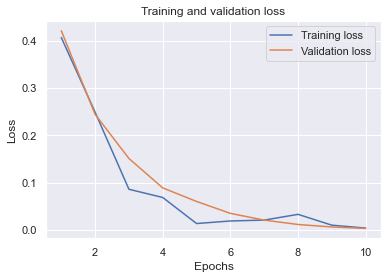

In [45]:
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Get the predictions on the test data
y_pred = bidirectional_lstm.predict(X_test)

# Visualize the model's predictions
plt.plot(y_test, label='True values')
plt.plot(y_pred, label='Predicted values')
plt.title('True vs. predicted values')
plt.xlabel('Samples')
plt.ylabel('Class')
plt.legend()
plt.show()

In [46]:
print(X_train)
print(y_train)

[[[ 0  0  0 ...  4  1 13]]

 [[ 0  0  0 ...  2  2 15]]

 [[ 0  0  0 ... 11  2  7]]

 [[ 0  0  0 ...  9  3 15]]

 [[ 0  0  0 ... 11  2  7]]]
[1 1 0 0 0]


## Applying  LSTM Bidirectional to classify the protein function

In [47]:
from keras.layers import Bidirectional
bidirectional_lstm = Sequential()
bidirectional_lstm.add(Bidirectional(LSTM(128, return_sequences=True), input_shape =(None,500)))
bidirectional_lstm.add(Bidirectional(LSTM(64)))
bidirectional_lstm.add(Dense(1, activation='sigmoid'))

In [48]:
model2 = Sequential()
model2.add(bidirectional_lstm)

In [49]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [50]:
model2.fit(X_train, y_train,
                  batch_size = batch_size,
                  epochs = nb_epoch, 
                  validation_data = (X_test, y_test), verbose= 1)

Epoch 1/100
3/3 [==============================] - 17s 2s/step - loss: 0.7506 - accuracy: 0.2000 - val_loss: 0.6844 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 51ms/step - loss: 0.3864 - accuracy: 1.0000 - val_loss: 0.6999 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 53ms/step - loss: 0.2489 - accuracy: 1.0000 - val_loss: 0.7075 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 50ms/step - loss: 0.1623 - accuracy: 1.0000 - val_loss: 0.7451 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 52ms/step - loss: 0.1054 - accuracy: 1.0000 - val_loss: 0.8114 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 58ms/step - loss: 0.0693 - accuracy: 1.0000 - val_loss: 0.8953 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 63ms/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 0.9896 - val_accuracy: 0.5000
Epoch 8/100
3/3 [====